# Lending Club Loan Data 

In [72]:
import pandas as pd
import numpy as np
import pandas_profiling
import warnings
import pandas_profiling
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## Part 1. Data Exploration and Evaluation

In this section, we 

### 1.1 Reading the data

In [2]:
date_columns = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 
         'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']

In [3]:
# loading the data from csv file and parsing the date columns as dates
data = pd.read_csv('/Users/christina/Desktop/LC/data/loan.csv', low_memory=False, parse_dates=date_columns)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaT,NaN,NaT,NaN,NaN,NaN


In [5]:
data.shape

(2260668, 145)

### 1.2 Fixing Data Types

In [6]:
data.dtypes.value_counts()

float64           105
object             27
datetime64[ns]      9
int64               4
dtype: int64

The dataset includes some numerical and some categorical variables. Let's group them.

We first group them based on the datatypes assigned during the data loading (which included parsing the date variables). Then we manually examine the variables and move the incorrectly assinged fields to the correct categories (e.g. `url` should be a categorical variable not numerical, and `policy_code` should be categorical and not numerical). 

The data types are split into 3 categories: 
* numerical
* categorical
* datetime

In [7]:
# grouping variables based on existing datatypes
numerical = []
categorical = []
dates = []

for col in list(data.columns):
    if data[col].dtype == np.float64 or data[col].dtype == np.int64:
        numerical.append(col)
    elif data[col].dtype == np.object:
        categorical.append(col) 
    else:
        dates.append(col)  

In [8]:
numerical = ['loan_amnt', 'funded_amnt', 'revol_bal',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'deferral_term',
 'hardship_amount',
 'hardship_length',
 'hardship_dpd',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [9]:
categorical = [
 'id',
 'member_id', 'term',
 'grade',
 'url',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'settlement_status', 'policy_code']

In [10]:
dates 

['issue_d',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'debt_settlement_flag_date',
 'settlement_date']

Now we will create two data pipelines to ensure the correct datatypes for numerical and categorical variables. 

In [11]:
def select_categorical_features(X):
    return X[categorical]

def select_numerical_features(X):
    return X[numerical]

def ensure_numerical_data_type(X):
    return X.apply(lambda col: col.astype(float))

def ensure_categorical_data_type(X):
    return X.apply(lambda col: col.astype(str))

# Pipeline for numeric features 
numeric_feature_pipeline = Pipeline(steps=[
    ('select', FunctionTransformer(select_numerical_features, validate=False)),
    ('datatype', FunctionTransformer(ensure_numerical_data_type, validate=False))
])

# Pipeline for categorical features 
categorical_pipeline = Pipeline(steps=[
    ('select', FunctionTransformer(select_categorical_features, validate=False)),
    ('datatype', FunctionTransformer(ensure_categorical_data_type, validate=False))
])

# Combining the two sets of features
fu = FeatureUnion([
    ('categorical', categorical_pipeline),
    ('numeric', numeric_feature_pipeline)
])

In [12]:
data_transformed = fu.fit_transform(data)
data_transformed = pd.DataFrame(data_transformed, columns=categorical+numerical)
data_transformed = pd.concat([data_transformed, data[dates]], axis=1)

In [13]:
data_transformed.head()

,id,member_id,term,grade,url,sub_grade,emp_title,emp_length,home_ownership,verification_status,...,settlement_term,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d,hardship_start_date,hardship_end_date,payment_plan_start_date,debt_settlement_flag_date,settlement_date
0,nan,nan,36 months,C,nan,C1,Chef,10+ years,RENT,Not Verified,...,NaN,2018-12-01,2019-02-01,2019-03-01,2019-02-01,NaT,NaT,NaT,NaT,NaT
1,nan,nan,60 months,D,nan,D2,Postmaster,10+ years,MORTGAGE,Source Verified,...,NaN,2018-12-01,2019-02-01,2019-03-01,2019-02-01,NaT,NaT,NaT,NaT,NaT
2,nan,nan,36 months,D,nan,D1,Administrative,6 years,MORTGAGE,Source Verified,...,NaN,2018-12-01,2019-02-01,2019-03-01,2019-02-01,NaT,NaT,NaT,NaT,NaT
3,nan,nan,36 months,D,nan,D2,IT Supervisor,10+ years,MORTGAGE,Source Verified,...,NaN,2018-12-01,2019-02-01,2019-03-01,2019-02-01,NaT,NaT,NaT,NaT,NaT
4,nan,nan,60 months,C,nan,C4,Mechanic,10+ years,MORTGAGE,Not Verified,...,NaN,2018-12-01,2019-02-01,2019-03-01,2019-02-01,NaT,NaT,NaT,NaT,NaT


In [14]:
assert data_transformed.shape == data.shape

In [32]:
df = data_transformed

### 1.3 Removing Columns with x% null values

In this section we will remove the columns that have more than 80% null values. The percentage threshold can be adjusted according to the use case. This step is a best practice to eliminate columns that would not provide any meaningful information to our analysis.

In [35]:
# store the % missing values for each column
missing = data.apply(lambda col: col.isnull()).sum().sort_values(ascending=False)/data.shape[0]

In [43]:
# looking at the columns that have more than 80% missing values
df_null = pd.DataFrame(missing, columns=['pct_missing'])
df_null[df_null['pct_missing']>0.8]

,pct_missing
id,1.000000
member_id,1.000000
url,1.000000
orig_projected_additional_accrued_interest,0.996273
hardship_start_date,0.995305
hardship_end_date,0.995305
payment_plan_start_date,0.995305
hardship_length,0.995305
hardship_dpd,0.995305
hardship_loan_status,0.995305


In [53]:
drop_columns = list(missing[missing > 0.8].index)
df = df.drop(columns=drop_columns)
print('We dropped {} columns'.format(len(drop_columns)))

We dropped 39 columns


In [54]:
df.shape

(2260668, 106)

In [55]:
numerical = [col for col in numerical if not col in drop_columns]
categorical = [col for col in categorical if not col in drop_columns]
dates = [col for col in dates if not col in drop_columns]

### 1.4 Data Exploration

#### Numerical Variables

Lets first take a look at the summary statistics of the numerical variables.

In [64]:
# numerical variables
data[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2260668.0,15046.931228,9190.245488,5.000000e+02,8000.00,12900.000000,20000.000000,4.000000e+04
funded_amnt,2260668.0,15041.664057,9188.413022,5.000000e+02,8000.00,12875.000000,20000.000000,4.000000e+04
revol_bal,2260668.0,16658.458078,22948.305028,0.000000e+00,5950.00,11324.000000,20246.000000,2.904836e+06
funded_amnt_inv,2260668.0,15023.437624,9192.331807,0.000000e+00,8000.00,12800.000000,20000.000000,4.000000e+04
int_rate,2260668.0,13.092913,4.832114,5.310000e+00,9.49,12.620000,15.990000,3.099000e+01
installment,2260668.0,445.807646,267.173725,4.930000e+00,251.65,377.990000,593.320000,1.719830e+03
annual_inc,2260664.0,77992.428687,112696.199574,0.000000e+00,46000.00,65000.000000,93000.000000,1.100000e+08
dti,2258957.0,18.824196,14.183329,-1.000000e+00,11.89,17.840000,24.490000,9.990000e+02
delinq_2yrs,2260639.0,0.306879,0.867230,0.000000e+00,0.00,0.000000,0.000000,5.800000e+01
inq_last_6mths,2260638.0,0.576835,0.885963,0.000000e+00,0.00,0.000000,1.000000,3.300000e+01


We observe a big variety of ranges among the different variables. If we were to fit a model on this data we would have to standardize it first. We also observe that certain variables have really high standard deviation, for example the annual income of the borrower (`annual_inc`). Lastly, the average loan is around $15,000. 

Now lets look at a correlation matrix of some key numerical columns.

In [76]:
key_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'revol_bal']

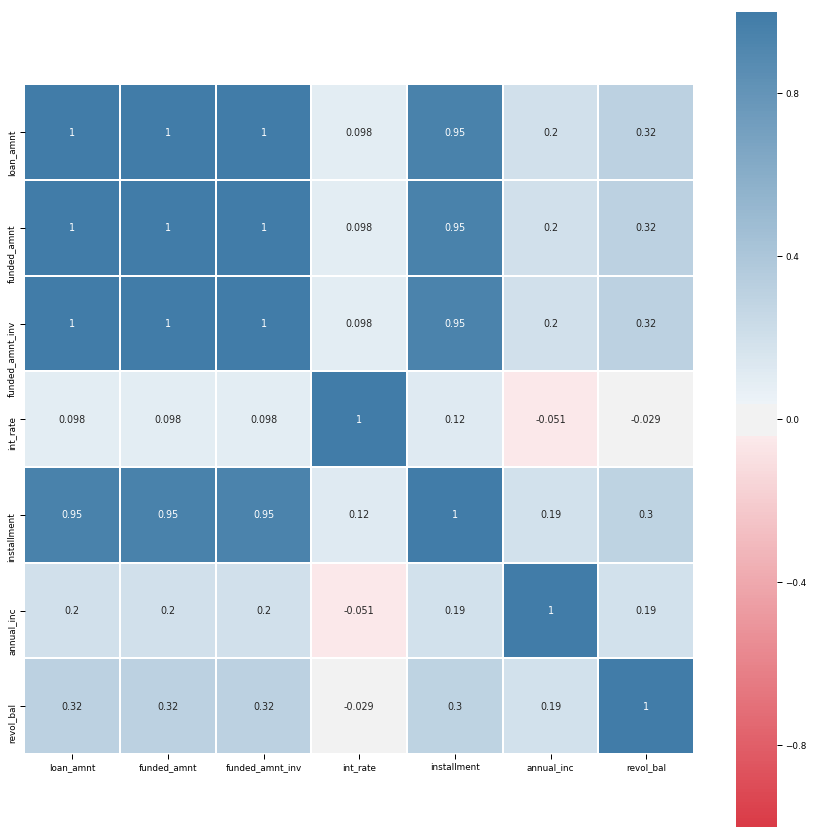

In [79]:
corr = data[key_columns].corr()
plt.figure(figsize=(15,15))
sns.set_context('paper', font_scale=1)
cmap = sns.diverging_palette(10, 240, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, vmin=-1, vmax=1, square=True, linewidths=1)

The correlation matrix shows that `loan_amnt`, `funded_amnt`, `funded_amnt_inv` and `installment` are very highly correlated with each other. Hence, multicollinearity among these variables should be taken into account when using this dataset. 

Next, we take a look at the distribution of numerical variables (see historgrams below). Most of the variables appear to be negatively skewed, with very few resembling a normal distribution (e.g. `all_util`, balance to credit limit on all trades).

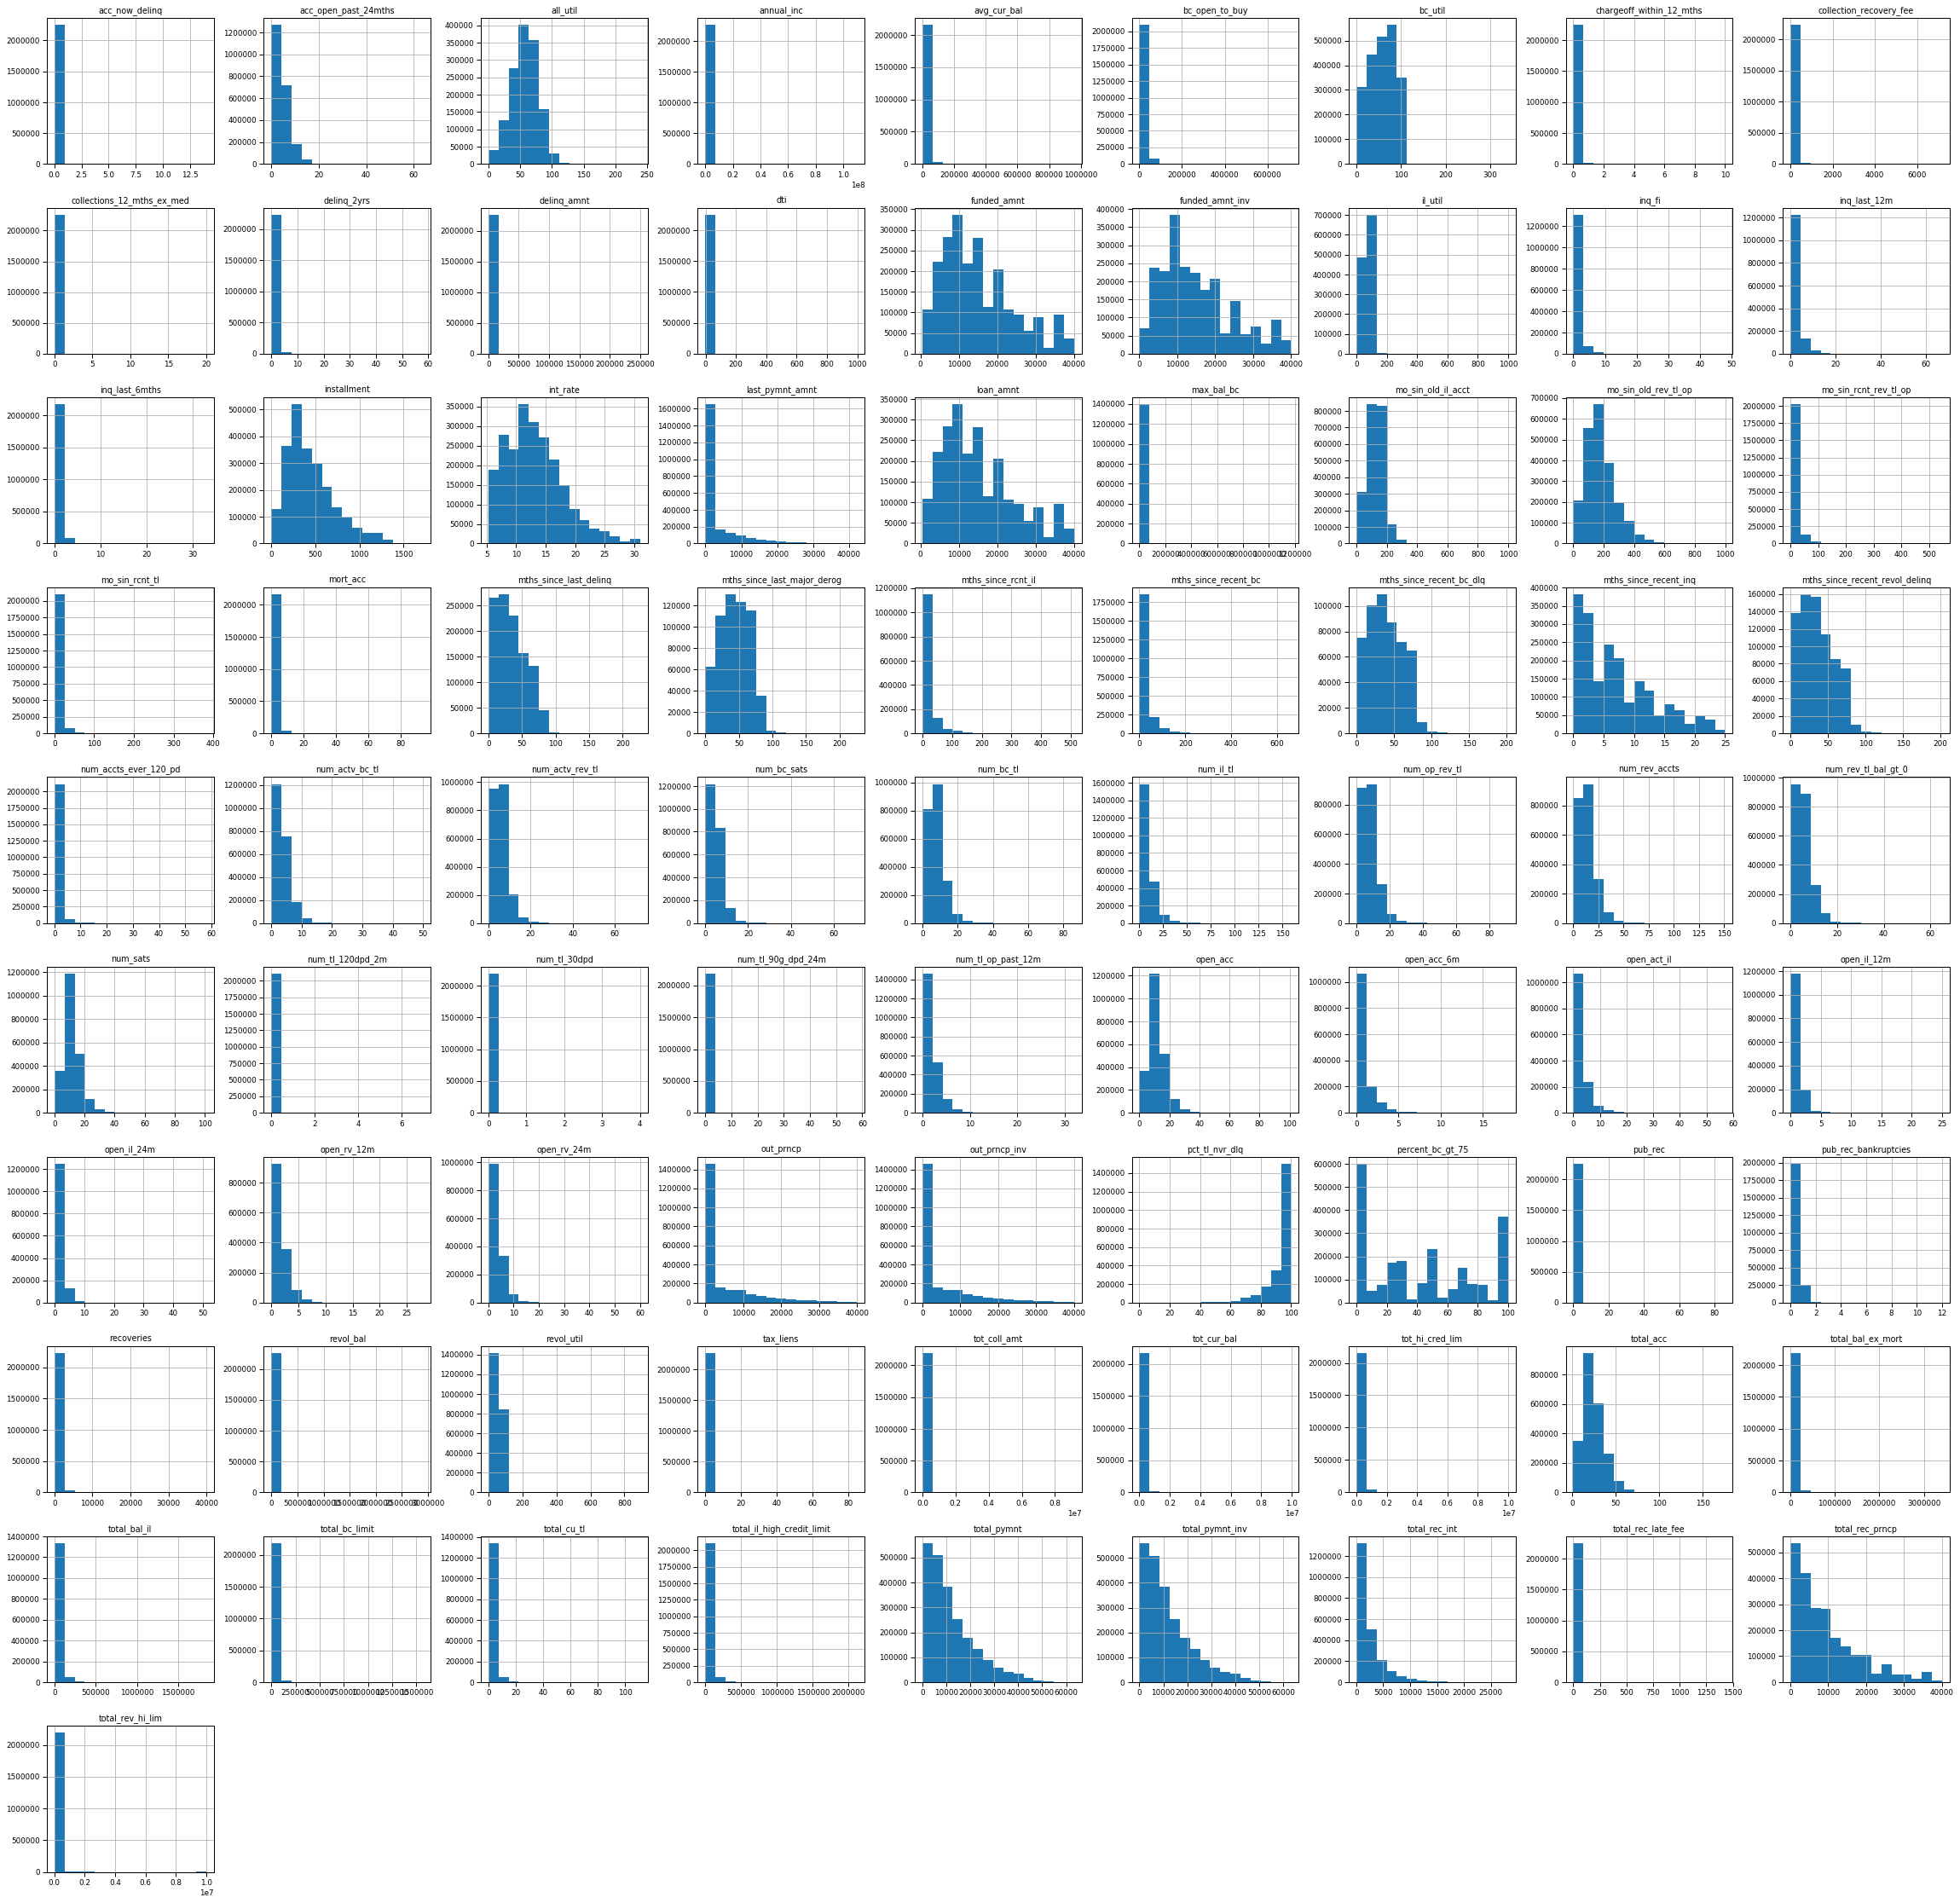

In [82]:
data[numerical].hist(figsize=(40,40), bins=15)
plt.show()

#### Categorical Variables

Now we will explore the distribution of the key categorical variables.

_Distribution of Loan Status_

In [101]:
loan_status_df = df['loan_status'].value_counts().to_frame().reset_index()
loan_status_df.columns = ['Loan Status', 'Count']
loan_status_df

,Loan Status,Count
0,Fully Paid,1041952
1,Current,919695
2,Charged Off,261655
3,Late (31-120 days),21897
4,In Grace Period,8952
5,Late (16-30 days),3737
6,Does not meet the credit policy. Status:Fully ...,1988
7,Does not meet the credit policy. Status:Charge...,761
8,Default,31


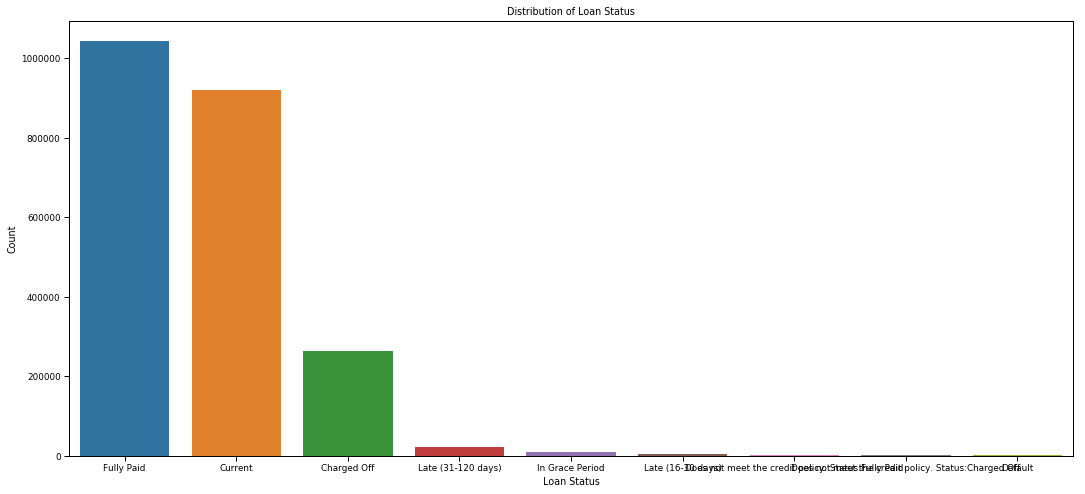

In [99]:
plt.subplots(figsize=(18,8))
sns.barplot(y='Count', x='Loan Status', data=loan_status_df)
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.show()

Most of the loans in the dataset are fully paid, and the second largest category is current loans. The third is charged off loans (never paid), and it is a quite large number in terms of loan counts. 

Another interesting observation is that only 31 out of 2,260,668 loans in our dataset have defaulted - that is 0.0014%. 

_Distribution of Loan Purpose_

In [115]:
loan_purpose_df = df['purpose'].value_counts().to_frame().reset_index()
loan_purpose_df.columns = ['Loan Purpose', 'Count']
loan_purpose_df

,Loan Purpose,Count
0,debt_consolidation,1277877
1,credit_card,516971
2,home_improvement,150457
3,other,139440
4,major_purchase,50445
5,medical,27488
6,small_business,24689
7,car,24013
8,vacation,15525
9,moving,15403


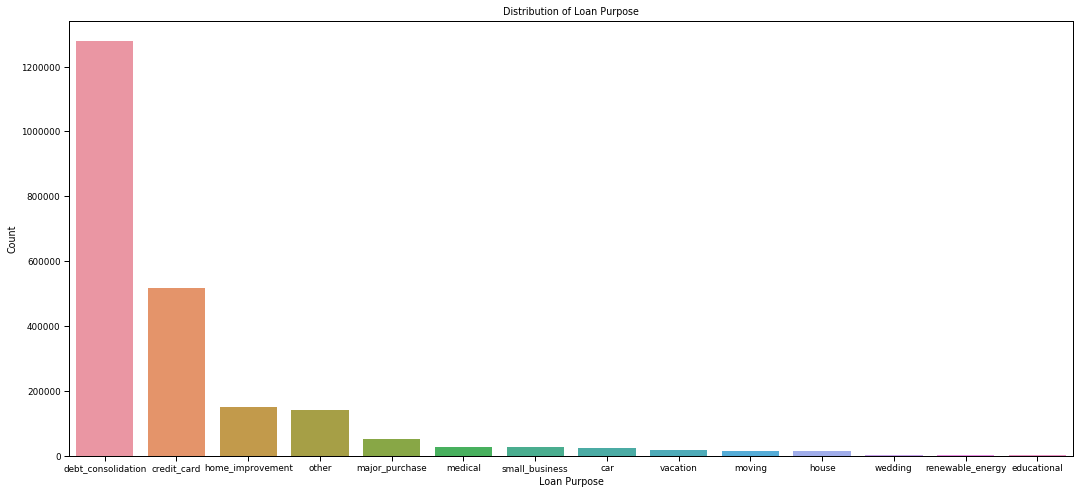

In [116]:
plt.subplots(figsize=(18,8))
sns.barplot(y='Count', x='Loan Purpose', data=loan_purpose_df)
plt.ylabel('Count')
plt.title('Distribution of Loan Purpose')
plt.show()

The most common purpose for a loan origination in our dataset is consolidation of debt, followed by credit card debt. 

_Distribution of Borrower's Job Title_

In [121]:
loan_emp_title_df = df['emp_title'].value_counts().to_frame().reset_index()
loan_emp_title_df.columns = ['Job Title', 'Count']
loan_emp_title_df.head()

,Job Title,Count
0,nan,166969
1,Teacher,38824
2,Manager,34298
3,Owner,21977
4,Registered Nurse,15867


The most common job titles are `Teacher`, `Manager`, and `Owner` and the majority of borrowers leave this field blank. 

_Distribution of Credit Ratings (i.e Grades)_

In [123]:
grade_df = df['grade'].value_counts().to_frame().reset_index()
grade_df.columns = ['Grade', 'Count']
grade_df

,Grade,Count
0,B,663557
1,C,650053
2,A,433027
3,D,324424
4,E,135639
5,F,41800
6,G,12168


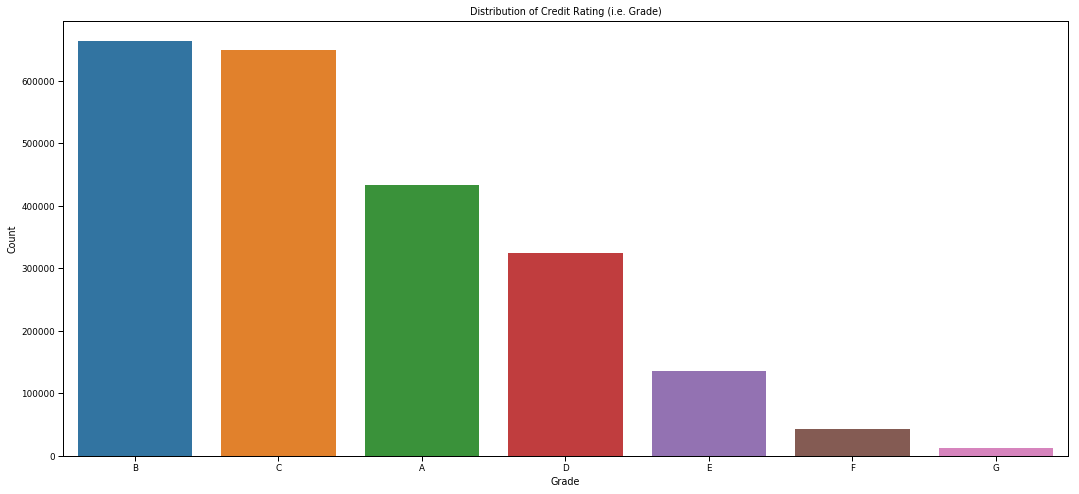

In [124]:
plt.subplots(figsize=(18,8))
sns.barplot(y='Count', x='Grade', data=grade_df)
plt.ylabel('Count')
plt.title('Distribution of Credit Rating (i.e. Grade)')
plt.show()

B and C are the most common credit rating categories in the dataset.